# Importing the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/train.csv')
testdf = pd.read_csv('dataset/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [4]:
print(f"Null values in train dataset \n{df.isna().sum()}")
print(f"Null values in test dataset \n{testdf.isna().sum()}")

Null values in train dataset 
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64
Null values in test dataset 
Customer ID                       0
Name                        

# Handling the missing Values

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
missing_cols = ['Gender', 'Income (USD)', 'Income Stability', 'Type of Employment', 
                'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'Has Active Credit Card',
                'Property Age', 'Property Location']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_to_imp = [c for c in missing_cols if c in num_cols]
si = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[num_cols] = si.fit_transform(df[num_cols])


testdf.replace("?", np.nan, inplace=True)
missing_cols_t = ['Gender', 'Income (USD)', 'Income Stability', 'Type of Employment', 
                'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'Has Active Credit Card',
                'Property Age', 'Property Location','Property Price','Co-Applicant']
num_cols_t = testdf.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_to_imp = [c for c in missing_cols_t if c in num_cols_t]
si = SimpleImputer(missing_values = np.nan, strategy = 'mean')
testdf[num_cols_t] = si.fit_transform(testdf[num_cols_t])

In [7]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
imp_cat_cols = [i for i in cat_cols if i in missing_cols]
cat_si = SimpleImputer(strategy = 'most_frequent')
df[imp_cat_cols] = cat_si.fit_transform(df[imp_cat_cols])

cat_cols_t = testdf.select_dtypes(include='object').columns.tolist()
imp_cat_cols = [i for i in cat_cols_t if i in missing_cols_t]
cat_si = SimpleImputer(strategy = 'most_frequent')
testdf[imp_cat_cols] = cat_si.fit_transform(testdf[imp_cat_cols])

In [8]:
print(df.isna().sum())
print(testdf.isna().sum())

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64
Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability              

# Visualizing the Dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

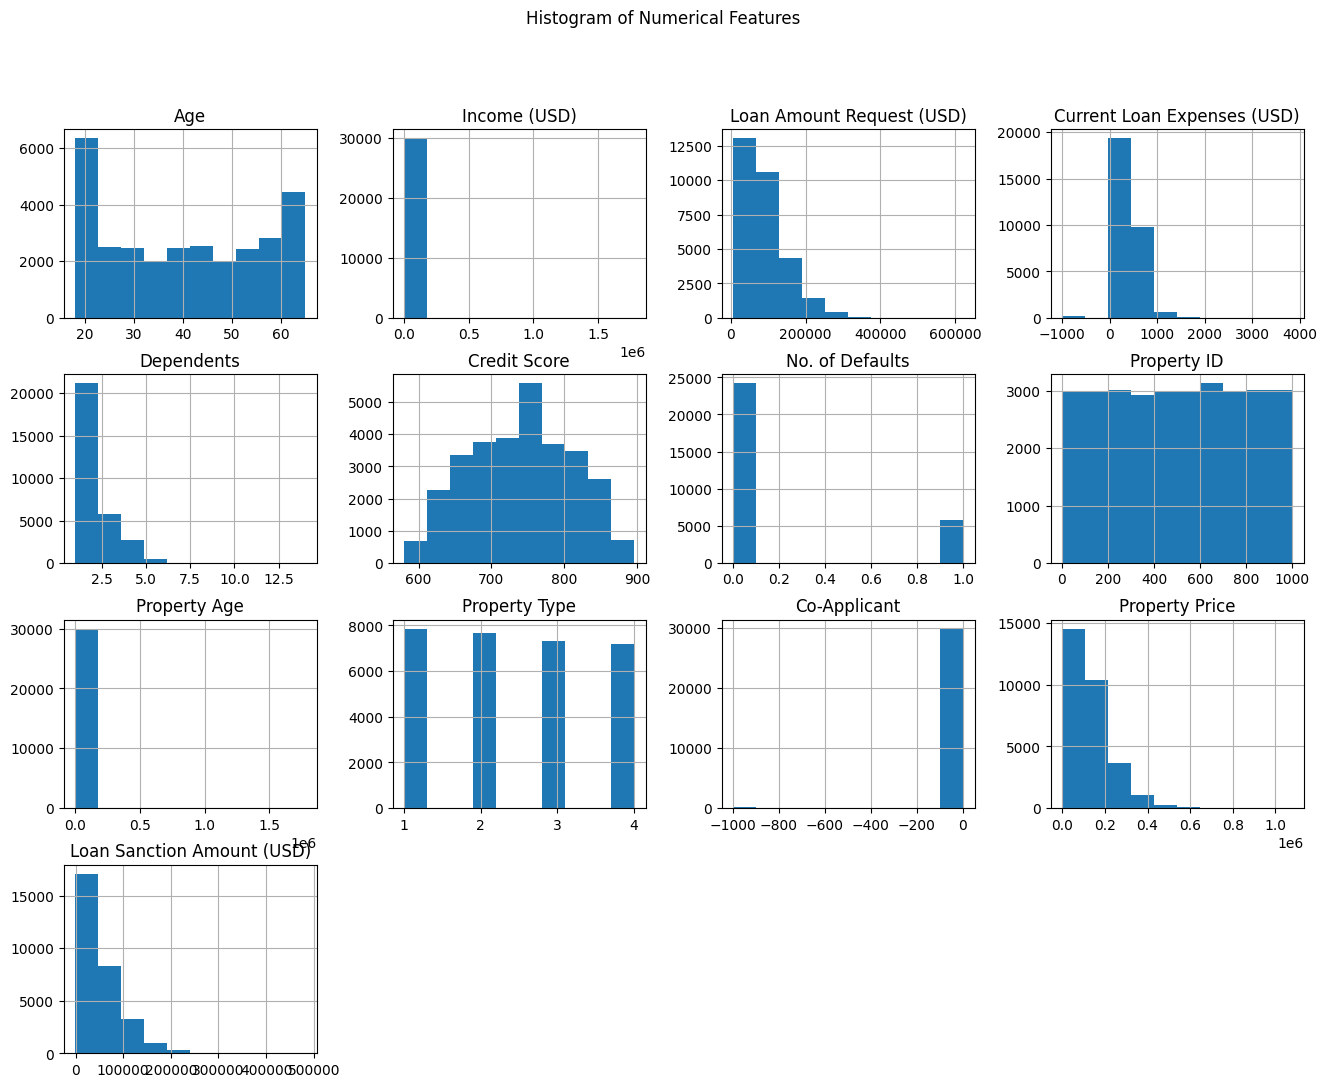

In [10]:
df[num_cols].hist(figsize=(16,12))
plt.suptitle("Histogram of Numerical Features")
plt.show()

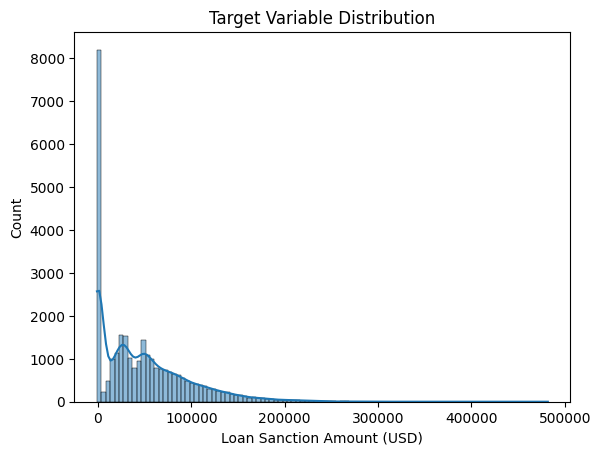

In [11]:
sns.histplot(df["Loan Sanction Amount (USD)"], kde=True)
plt.title("Target Variable Distribution")
plt.savefig("targetDist.png", dpi=150)
plt.show()

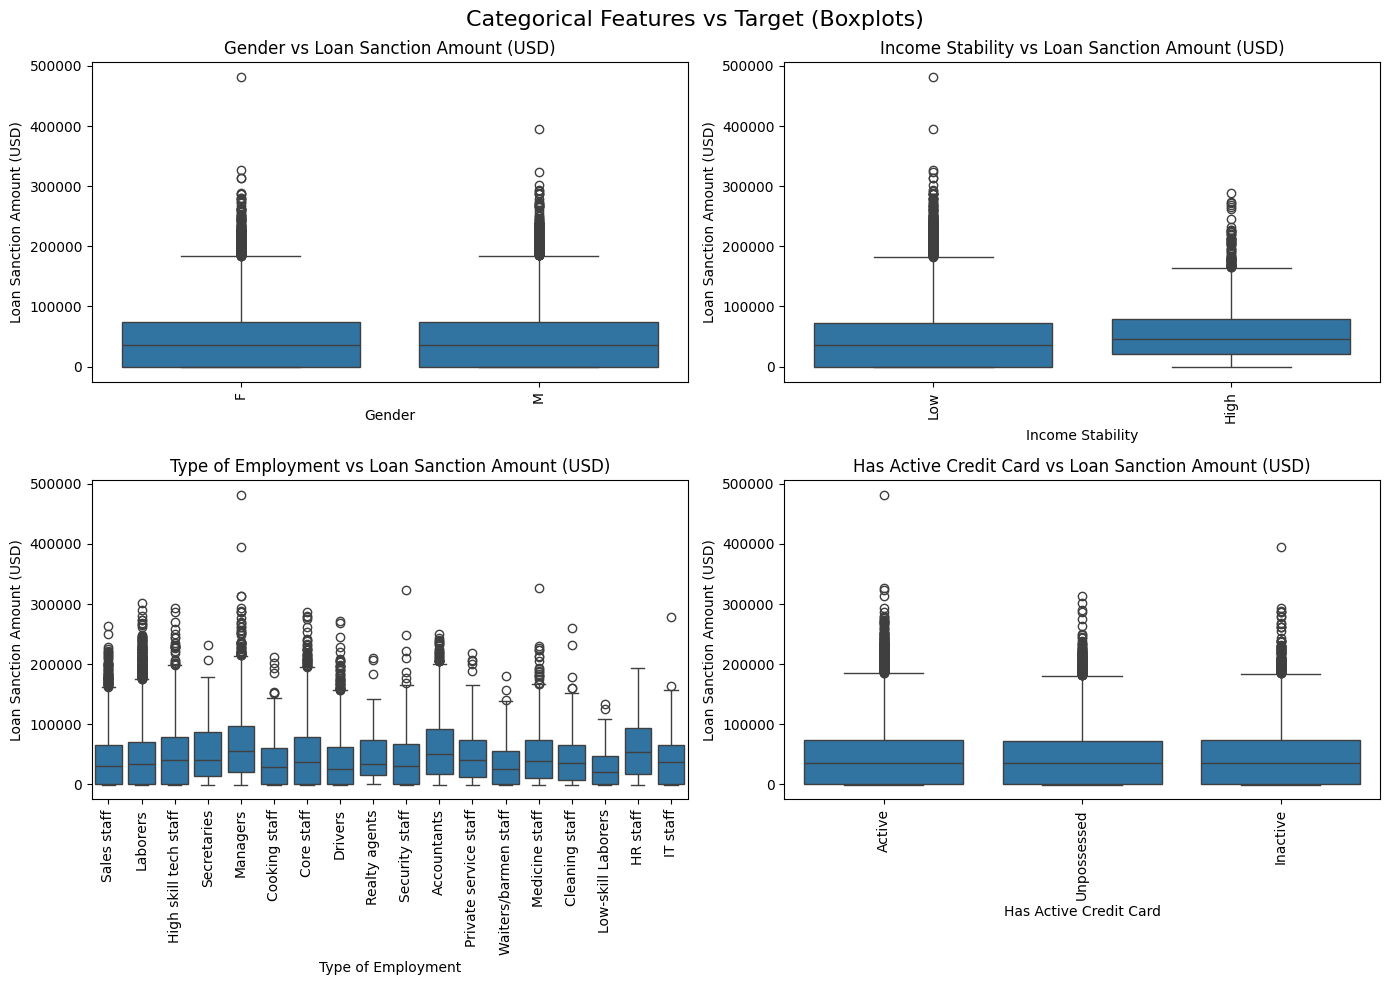

In [12]:
target_col = "Loan Sanction Amount (USD)"

categorical_cols = [
    "Gender",
    "Income Stability",
    "Type of Employment",
    "Has Active Credit Card"
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

fig.suptitle("Categorical Features vs Target (Boxplots)", fontsize=16)

for i, col in enumerate(categorical_cols):
    sns.boxplot(
        data=df,
        x=col,
        y=target_col,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs {target_col}")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig("boxPlots.png", dpi=150)
plt.show()

Text(0, 0.5, 'Count')

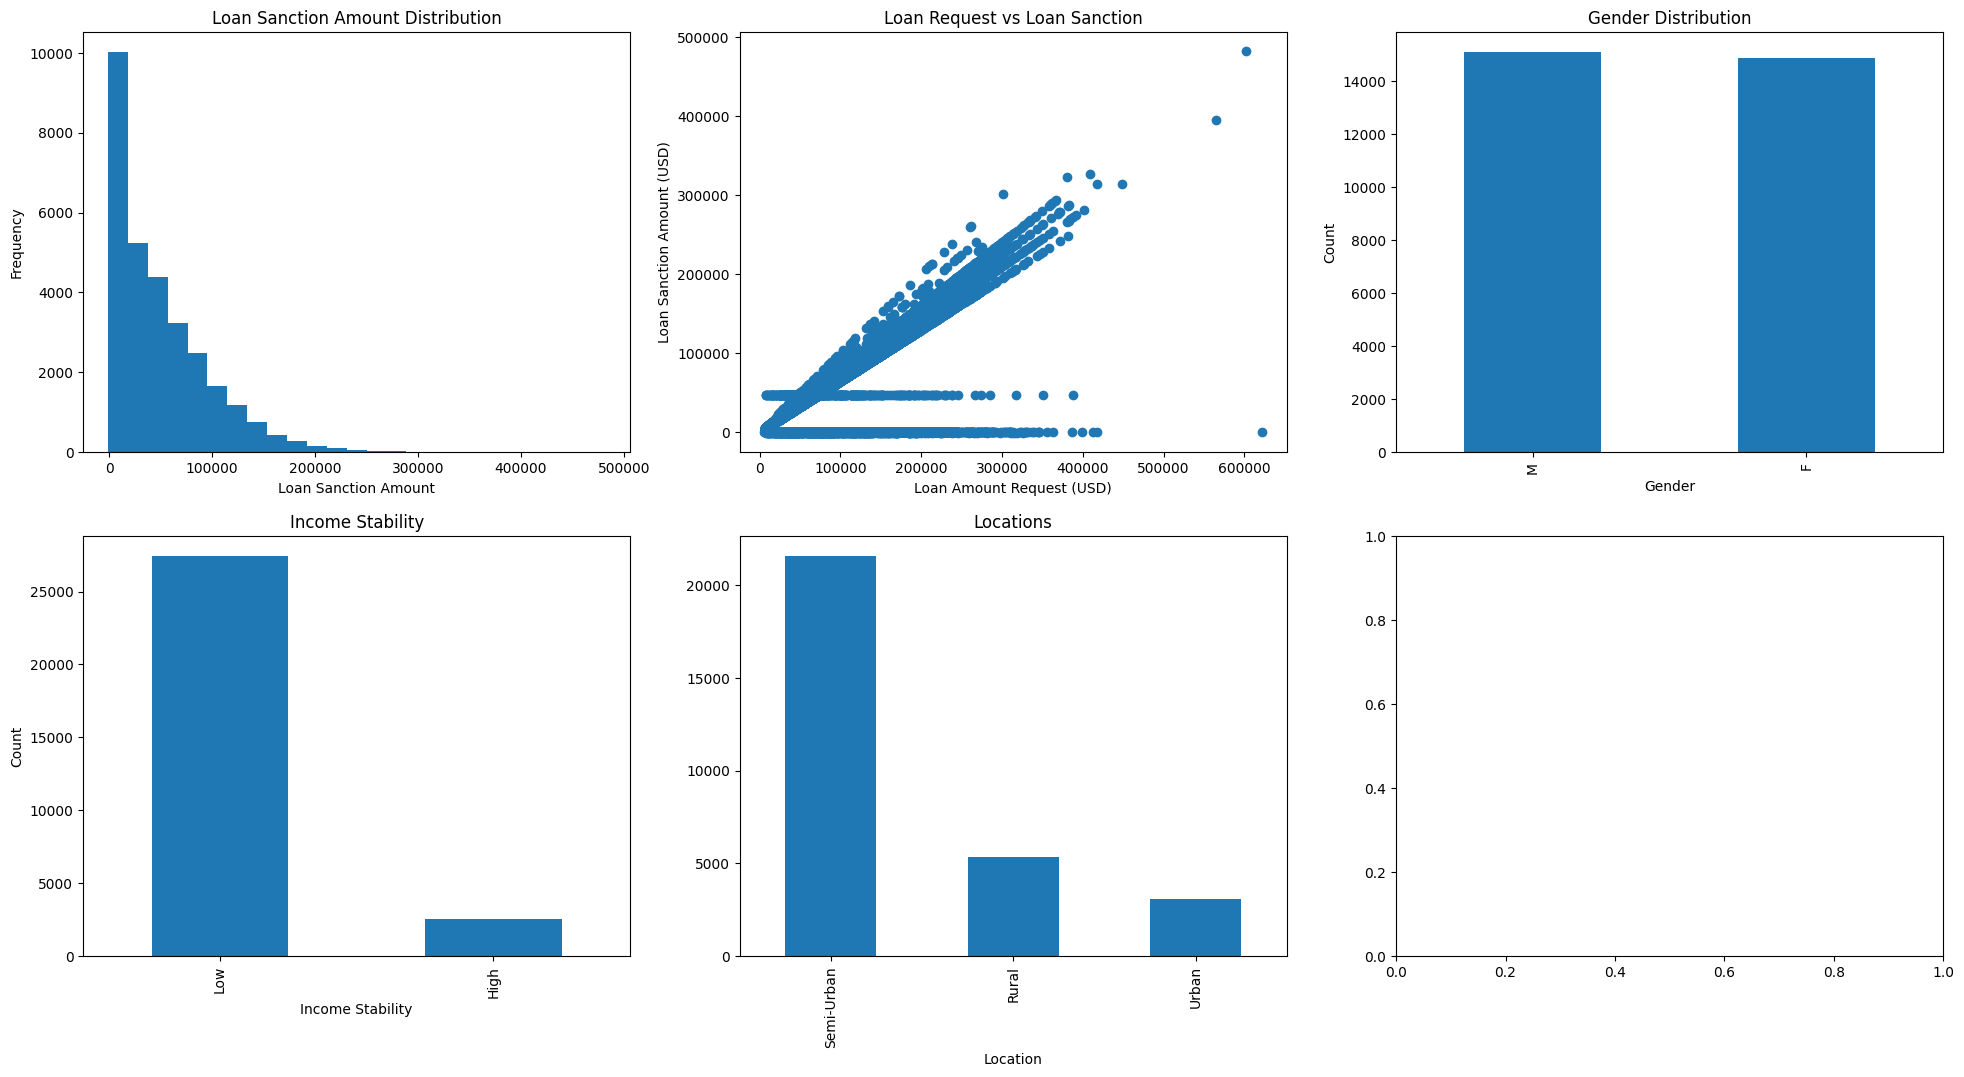

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
axes = axes.flatten()

axes[0].hist(df["Loan Sanction Amount (USD)"], bins=25)
axes[0].set_title("Loan Sanction Amount Distribution")
axes[0].set_xlabel("Loan Sanction Amount")
axes[0].set_ylabel("Frequency")
axes[1].scatter(df["Loan Amount Request (USD)"], df["Loan Sanction Amount (USD)"])
axes[1].set_xlabel("Loan Amount Request (USD)")
axes[1].set_ylabel("Loan Sanction Amount (USD)")
axes[1].set_title("Loan Request vs Loan Sanction")
df["Gender"].value_counts().plot(kind = 'bar', ax = axes[2])
axes[2].set_title("Gender Distribution")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Count")
df["Income Stability"].value_counts().plot(kind = 'bar', ax = axes[3])
axes[3].set_title("Income Stability")
axes[3].set_xlabel("Income Stability")
axes[3].set_ylabel("Count")
df["Location"].value_counts().plot(kind = 'bar', ax = axes[4])
axes[4].set_title("Locations")
axes[3].set_ylabel("Count")

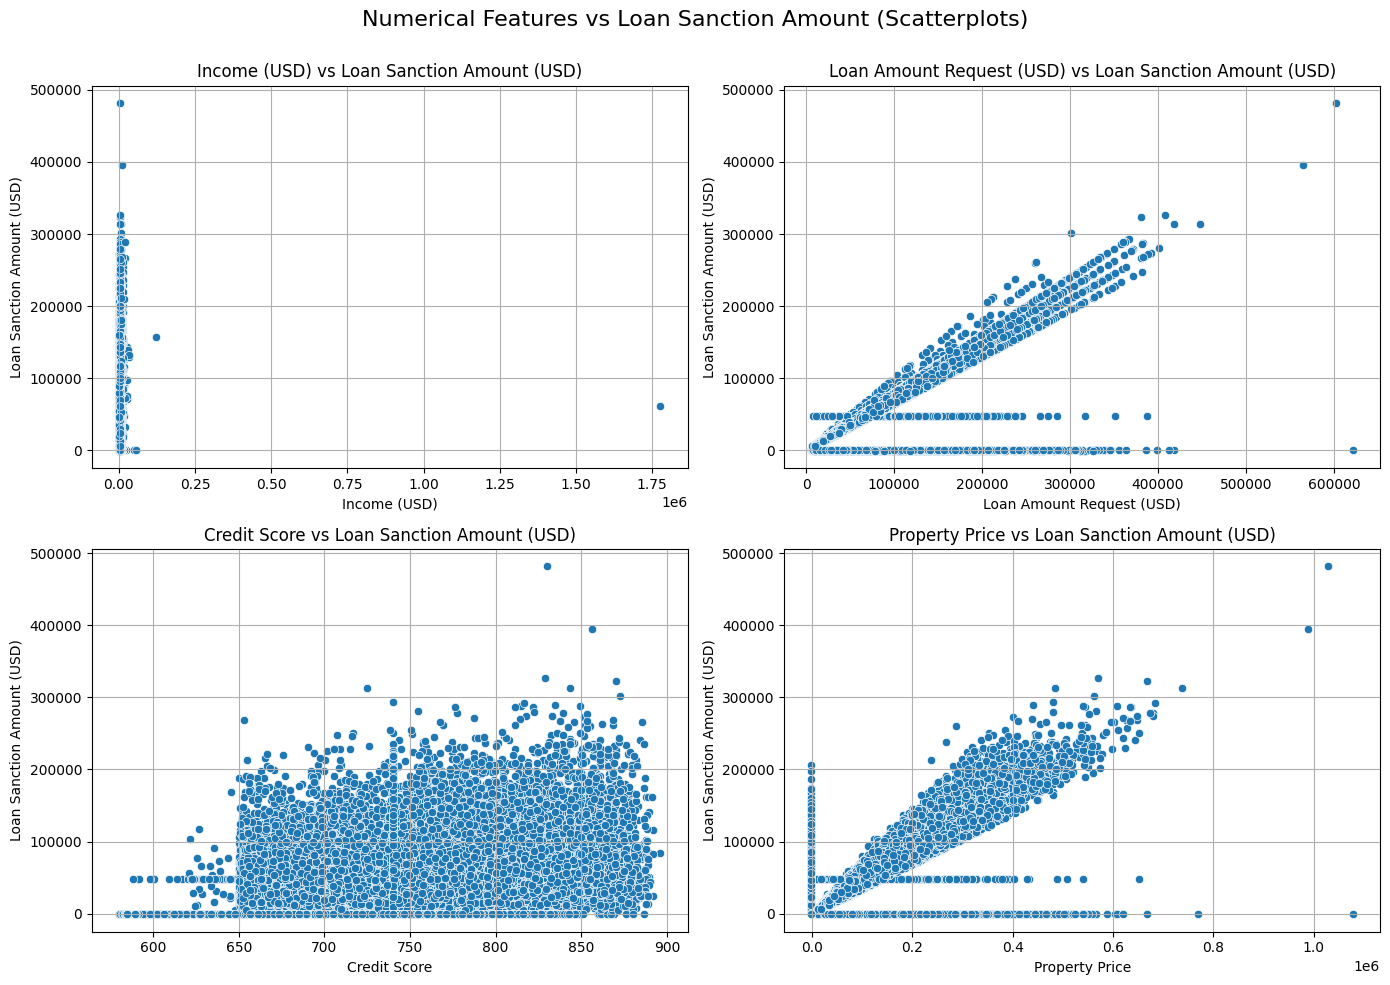

In [53]:
target_col = "Loan Sanction Amount (USD)"

# Select 4 numerical features
numerical_cols = [
    "Income (USD)",
    "Loan Amount Request (USD)",
    "Credit Score",
    "Property Price"
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

fig.suptitle(
    "Numerical Features vs Loan Sanction Amount (Scatterplots)\n",
    fontsize=16
)

for i, col in enumerate(numerical_cols):
    sns.scatterplot(
        data=df,
        x=col,
        y=target_col,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs {target_col}")
    axes[i].grid(True)

plt.tight_layout()
plt.savefig("images/scatterPlots.png", dpi=150)
plt.show()

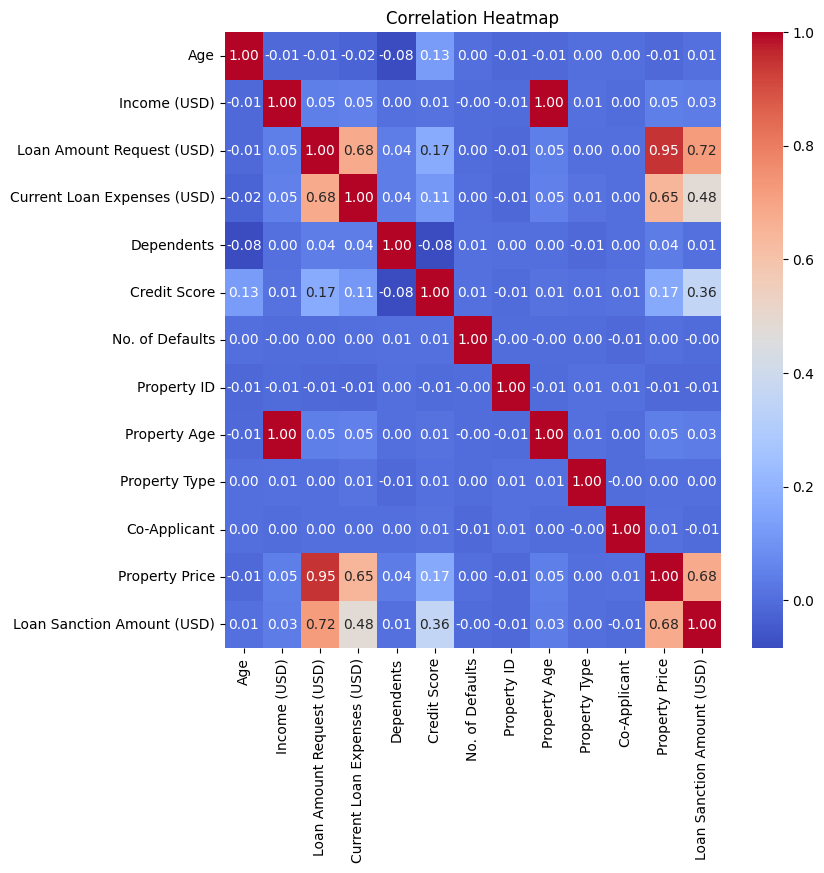

In [14]:
corr = df[num_cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Lable Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
for i in cat_cols:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_cols:
    testdf[i] = LabelEncoder().fit_transform(testdf[i])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df['Loan Sanction Amount (USD)']
df_new = df.drop('Loan Sanction Amount (USD)',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.20, random_state = 42)

In [19]:
print("Train size:", X_train.shape)
print("Internal test size:", X_test.shape)

Train size: (24000, 23)
Internal test size: (6000, 23)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [24]:
print("Metrics")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Metrics
Mean Squared Error: 906300898.7197301
Mean Absolute Error: 20722.686542082465
Root Mean Squared Error: 30104.831816831833
R2 Score: 0.6057733605796679


In [25]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()

cv_scores = cross_val_score(
    model,
    df_new,
    y,
    cv=5,
    scoring="r2"
)

print("CV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

CV R² scores: [0.59364883 0.60479666 0.60457232 0.60387699 0.63638861]
Mean CV R²: 0.6086566818613701


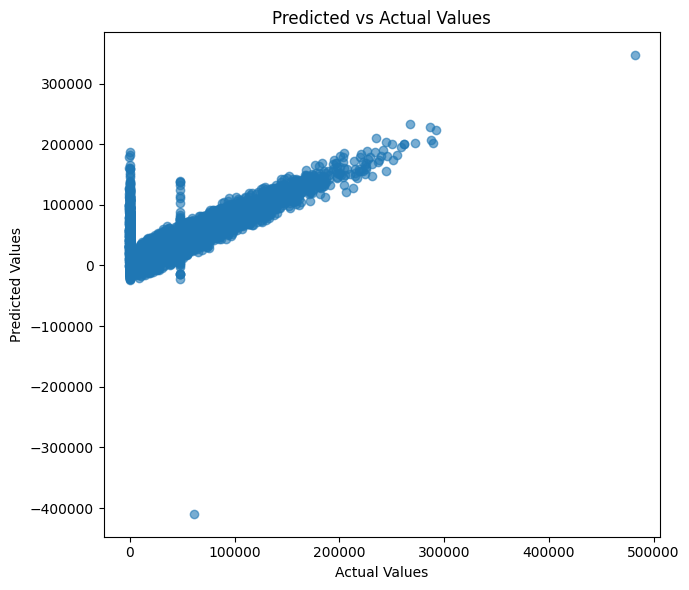

In [26]:
plt.figure(figsize=(7, 6))

plt.scatter(y_test, y_pred, alpha=0.6)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")

plt.tight_layout()
plt.savefig("linearPreVsAct.png", dpi=150)
plt.show()

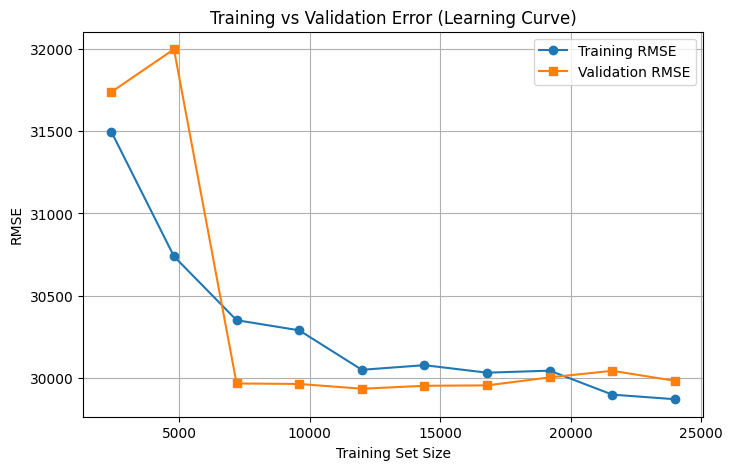

In [27]:
from sklearn.model_selection import learning_curve
model = LinearRegression()

train_sizes, train_scores, val_scores = learning_curve(
    model,
    df_new,
    y,
    cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse   = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, marker='o', label="Training RMSE")
plt.plot(train_sizes, val_rmse, marker='s', label="Validation RMSE")

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Training vs Validation Error (Learning Curve)")
plt.legend()
plt.grid(True)
plt.savefig("TrainVsValid.png", dpi=150)
plt.show()

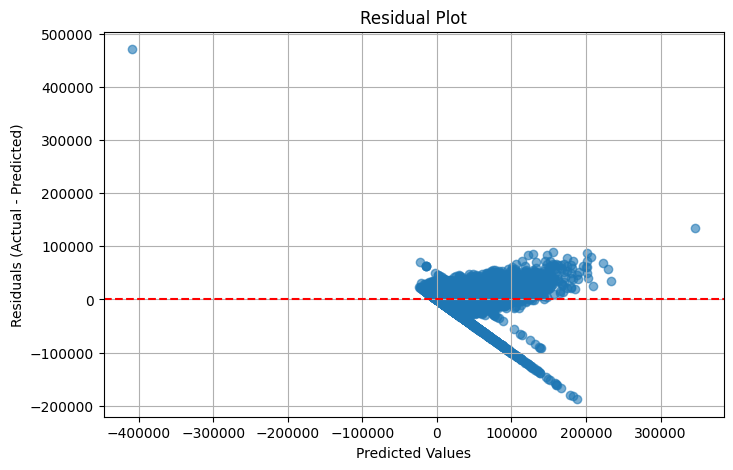

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.savefig("linearRes.png", dpi=150)
plt.show()

# Ridge Regression

In [29]:
from sklearn.linear_model import Ridge, Lasso

In [30]:
rd = Ridge()

In [31]:
rd.fit(X_train,y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [32]:
y_pred = rd.predict(X_test)

In [33]:
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Squared Error: 906294622.4435518
Mean Absolute Error: 20722.680369576858
Root Mean Squared Error: 30104.727576305217
R2 Score: 0.6057760906611115


# Lasso Regression

In [34]:
la = Lasso()

In [35]:
la.fit(X_train,y_train)

E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+13, tolerance: 5.517e+09
  model = cd_fast.enet_coordinate_descent(


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [36]:
y_pred = la.predict(X_test)

In [37]:
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Squared Error: 906218854.3295258
Mean Absolute Error: 20722.512657473093
Root Mean Squared Error: 30103.469141106078
R2 Score: 0.605809048599264


# Elastic Net Model

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
elasticnetmodel = ElasticNet(max_iter=10000)

In [40]:
elasticnetmodel.fit(X_train,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1.0
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",10000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [41]:
y_pred = elasticnetmodel.predict(X_test)

In [42]:
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Squared Error: 898050647.1127926
Mean Absolute Error: 20719.651718317255
Root Mean Squared Error: 29967.493173650553
R2 Score: 0.6093620902940152


# Hyperparameter tuning

### Hyperparameter tuning for Ridge Regression

In [43]:
from sklearn.model_selection import GridSearchCV
import time

In [44]:
para_grid = {
    'alpha': [0.1,0.2,0.4,0.6,0.8]
}

ridgegd = GridSearchCV(Ridge(),para_grid, cv = 5,scoring='r2', n_jobs = -1)

In [45]:
start_time = time.time()
ridgegd.fit(X_train,y_train)
end_time = time.time()

In [46]:
ridge_training_time = end_time - start_time
y_pred = ridgegd.predict(X_test)

In [47]:
print("Ridge Regression - Hyperparameter Tuning Results\n")
print("Best Parameters:", ridgegd.best_params_)
print("Best CV R²      :", ridgegd.best_score_)
print("\nValidation Metrics:")
print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test,y_pred):.2f}")
print(f"R²  : {r2_score(y_test,y_pred):.4f}")
print("\nTraining Time (s):", ridge_training_time)

Ridge Regression - Hyperparameter Tuning Results

Best Parameters: {'alpha': 0.8}
Best CV R²      : 0.6080782246168596

Validation Metrics:
MAE : 20722.68
MSE : 906295876.93
RMSE: 30104.75
R²  : 0.6058

Training Time (s): 3.979886054992676


### Hyperparameter tuning for Lasso Regression 

In [48]:
para_grid = {
    'alpha': [0.01,0.1,1,10,100]
}

gdl = GridSearchCV(Lasso(),para_grid,cv=5,scoring='r2', n_jobs = -1)

In [49]:
start_time = time.time()
gdl.fit(X_train,y_train)
end_time = time.time()

E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.816e+12, tolerance: 5.517e+09
  model = cd_fast.enet_coordinate_descent(


In [50]:
lasso_training_time  = end_time - start_time
y_pred = gdl.predict(X_test)

In [51]:
print("Best Parameters:", gdl.best_params_)
print("Best CV R²      :", gdl.best_score_)
print("\nValidation Metrics:")
print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test,y_pred):.2f}")
print(f"R²  : {r2_score(y_test,y_pred):.4f}")
print("\nTraining Time (s):", lasso_training_time)

Best Parameters: {'alpha': 100}
Best CV R²      : 0.608104093602198

Validation Metrics:
MAE : 20716.18
MSE : 899120095.27
RMSE: 29985.33
R²  : 0.6089

Training Time (s): 8.174497604370117


### Hyperparameter tuning for Elastic Net Regression

In [52]:
from sklearn.linear_model import ElasticNet

In [54]:
para_grid = {
    'alpha' : [0.01,0.1,1,10],
    'l1_ratio' : [0.2,0.5,0.8]
}

elasticgrid = GridSearchCV(ElasticNet(),para_grid,cv = 5,scoring='r2',n_jobs = -1)

In [55]:
start_time = time.time()
elasticgrid.fit(X_train,y_train)
end_time = time.time()

E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+13, tolerance: 5.517e+09
  model = cd_fast.enet_coordinate_descent(


In [56]:
elastic_training_time = end_time - start_time
y_pred = elasticgrid.predict(X_test)

In [57]:
print("Best Parameters:", elasticgrid.best_params_)
print("Best CV R²      :", elasticgrid.best_score_)
print("\nValidation Metrics:")
print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
print(f"MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test,y_pred):.2f}")
print(f"R²  : {r2_score(y_test,y_pred):.4f}")
print("\nTraining Time (s):", elastic_training_time)

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.2}
Best CV R²      : 0.6081264211602803

Validation Metrics:
MAE : 20719.67
MSE : 901275943.74
RMSE: 30021.26
R²  : 0.6080

Training Time (s): 14.794727087020874


In [58]:
def plot_pred_vs_actual(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    
    plt.figure(figsize=(6,6))
    plt.scatter(y_val, y_pred, alpha=0.6)
   # plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Predicted vs Actual")
    plt.grid(True)
    #plt.show()
    return plt

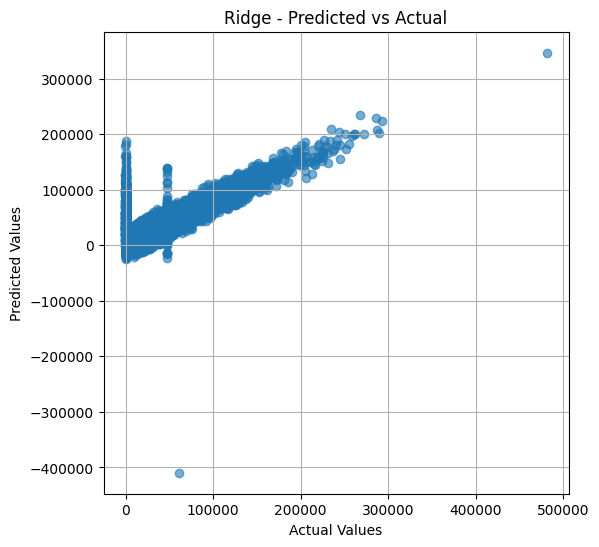

In [59]:
plot_pred_vs_actual(ridgegd.best_estimator_, X_test, y_test, "Ridge")
plt.savefig("images/RidgePreVsAct.png", dpi=150)

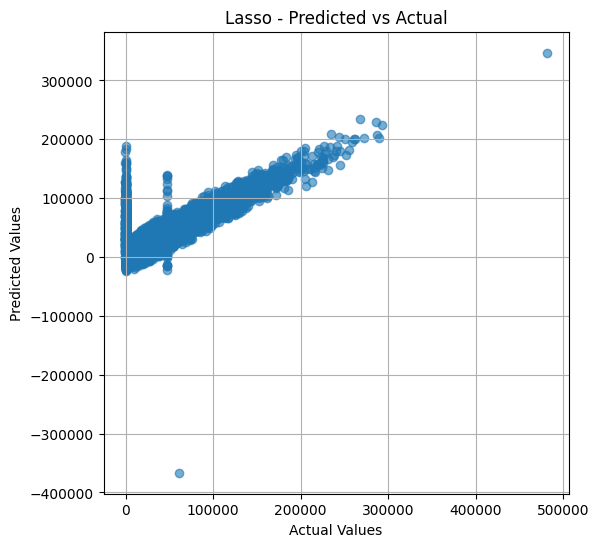

In [60]:
plot_pred_vs_actual(gdl.best_estimator_, X_test, y_test, "Lasso")
plt.savefig("images/LassoPreVsAct.png", dpi=150)

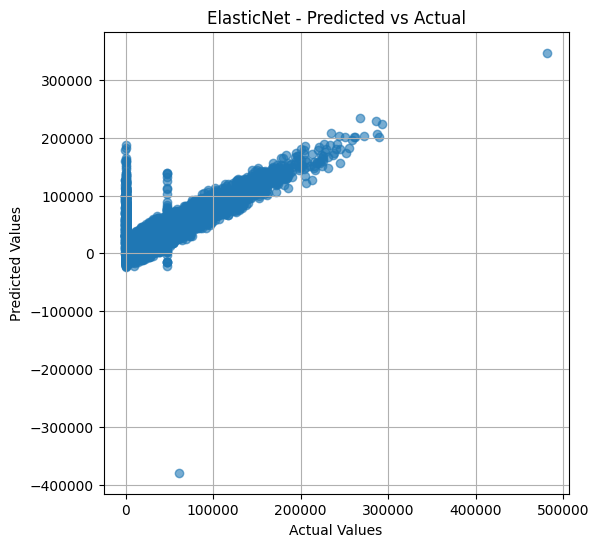

In [61]:
plot_pred_vs_actual(elasticgrid.best_estimator_, X_test, y_test, "ElasticNet")
plt.savefig("images/ElasticPreVsAct.png", dpi=150)


In [62]:
def plot_learning_curve(model, X_train, y_train, model_name, scoring='neg_mean_absolute_error'):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X_train,
        y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean   = -np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Error')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Validation Error')
    
    plt.xlabel("Training Set Size")
    plt.ylabel("MAE")
    plt.title(f"{model_name} - Learning Curve (MAE)")
    plt.legend(loc='best')
    plt.grid(True)
    #plt.show()
    return plt

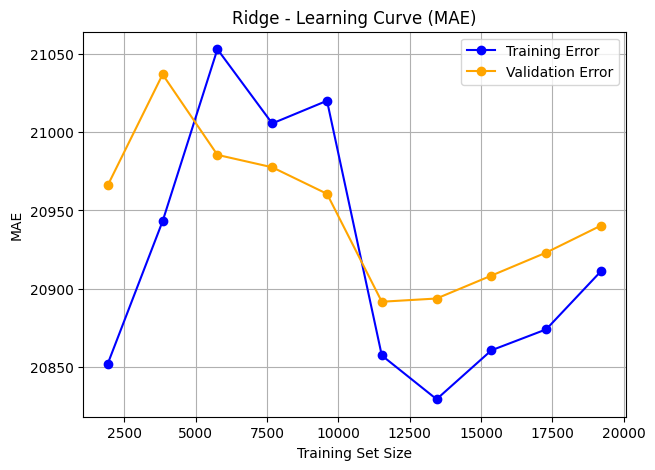

In [63]:
plot_learning_curve(ridgegd.best_estimator_, X_train, y_train, "Ridge")
plt.savefig("images/RidgeTrainVsValid.png", dpi=150)

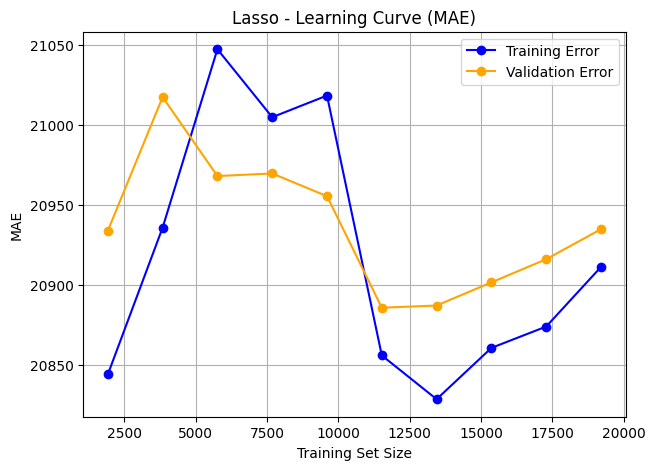

In [64]:
plot_learning_curve(gdl.best_estimator_, X_train, y_train, "Lasso")
plt.savefig("images/LassoTrainVsValid.png", dpi=150)

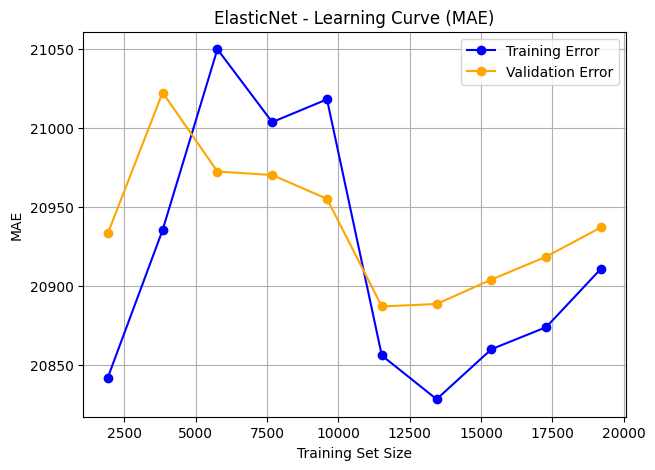

In [65]:
plot_learning_curve(elasticgrid.best_estimator_, X_train, y_train, "ElasticNet")
plt.savefig("images/ElasticTrainVsValid.png", dpi=150)

In [66]:
def plot_residuals(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    residuals = y_val - y_pred
    
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='--', lw=2)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"{model_name} - Residual Plot (Validation)")
    plt.grid(True)
   # plt.show()
    return plt

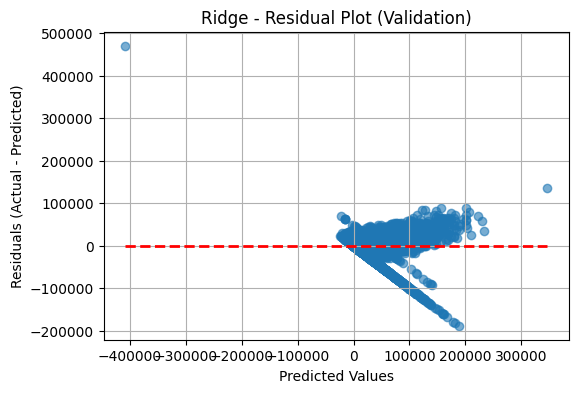

In [67]:
plot_residuals(ridgegd.best_estimator_, X_test, y_test, "Ridge")
plt.savefig("images/RidgeRes.png", dpi=150)

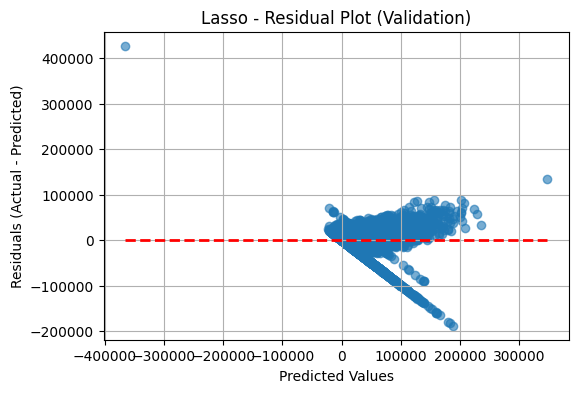

In [68]:
plot_residuals(gdl.best_estimator_, X_test, y_test, "Lasso")
plt.savefig("images/LassoRes.png", dpi=150)

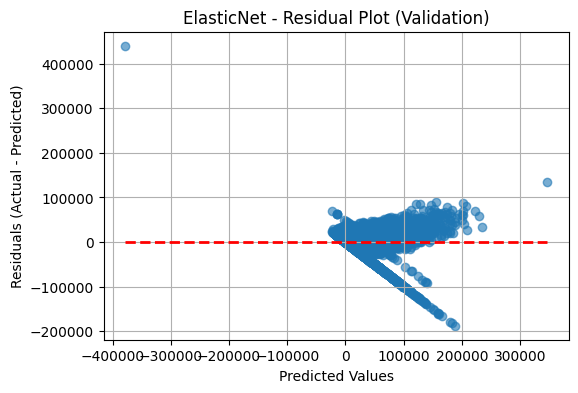

In [69]:
plot_residuals(elasticgrid.best_estimator_, X_test, y_test, "ElasticNet")
plt.savefig("images/ElasticRes.png", dpi=150)

In [70]:
def plot_coefficients(models, model_names, feature_names):
    n_features = len(feature_names)
    x = np.arange(n_features)
    width = 0.25 

    plt.figure(figsize=(max(15, n_features*0.4),8))

    for i, model in enumerate(models):
        coefs = model.coef_
        plt.bar(x + i*width, coefs, width=width, label=model_names[i])

    plt.xticks(x + width, feature_names, rotation=90)
    plt.ylabel("Coefficient Value")
    plt.title("Coefficient Comparison")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("images/CoefficientComparision.png", dpi=150)
    plt.show()

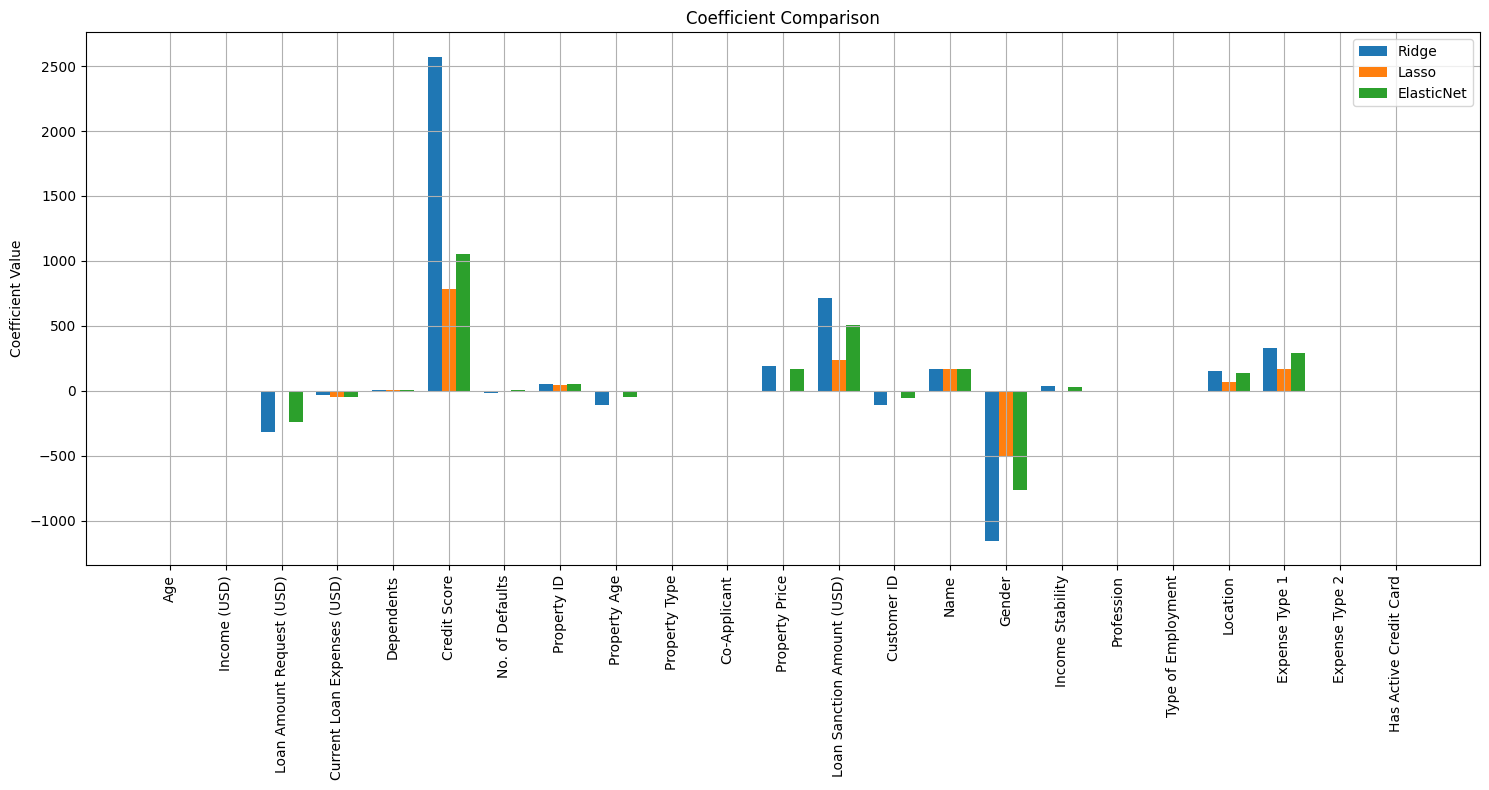

In [75]:
feature_names = num_cols + cat_cols
models = [
    ridgegd.best_estimator_,
    gdl.best_estimator_,
    elasticgrid.best_estimator_]

model_names = ["Ridge", "Lasso", "ElasticNet"]

# take coefficient length from first model
n = len(models[0].coef_)

# trim feature names if longer
feature_names = feature_names[:n]

plot_coefficients(models, model_names, feature_names)